Dataset came from Kaggle => https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?select=movies.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = './movies.csv'
movies_df = pd.read_csv(filename)
movies_df.info()
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Initial Observations: <br>
1. There are many missing/null values in the Year, Genre, Rating, Votes, Runtime, Gross
2. Year and Gross should be an integer. However, Year has ranges and need to determine what to do about them
3. May of the columns have "\n" and need to remove that


In [3]:
# copy of original  dataset
movies_df2 = movies_df.copy()

In [47]:
movies_df.duplicated().sum()
# 431 duplicates


431

In [48]:
movies_df = movies_df.drop_duplicates()
movies_df.duplicated().sum()

0

In [49]:
# checking null values
missing_values_count= movies_df.isna().sum()
missing_values_count

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem: <br>
Resource: https://www.kaggle.com/code/alexisbcook/handling-missing-values gave me the inspiration to determine the percentage of missed values

In [50]:
# how many total missing values do we have?
total_cells = np.product(movies_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f"There is {percent_missing.round(decimals=2)}% missing data" )

There is 17.52% missing data


In [51]:
def check_df_null_percentage(df):
    missing_values_count= df.isna().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_cells) * 100
    total_rows = df.shape[0]
    # created percentage null checks for each row 
    for col in df:
        series = df[col]
        each_series_null_values = series.isna().sum()
        percentage_each_series = (each_series_null_values/total_rows) * 100
        percentage_each_series_df  = (each_series_null_values/total_cells) * 100
        text = (
            f'''Series column {col} has {each_series_null_values} missing values which is 
            {percentage_each_series.round(decimals=2)} % of row data or 
            {percentage_each_series_df.round(decimals=2)} of the whole dataset'''
        )
        print(text)
    print(f"There is {percent_missing.round(decimals=2)}% missing data in your dataset" )
    

Created function to check the percentage of missed data 

In [52]:
check_df_null_percentage(movies_df)

Series column MOVIES has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column YEAR has 542 missing values which is 
            5.66 % of row data or 
            0.63 of the whole dataset
Series column GENRE has 78 missing values which is 
            0.82 % of row data or 
            0.09 of the whole dataset
Series column RATING has 1400 missing values which is 
            14.63 % of row data or 
            1.63 of the whole dataset
Series column ONE-LINE has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column STARS has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column VOTES has 1400 missing values which is 
            14.63 % of row data or 
            1.63 of the whole dataset
Series column RunTime has 2560 missing values which is 
            26.76 % of row data or 
            2.97 of the whole d

Columns to Keep --> <br/> Movies, 
Columns to Drop rows/columns --> <br/> Genre rows, 
Columns to Fill in --> <br/> Year


Visualizes Missed Data: https://github.com/ResidentMario/missingno

<Axes: >

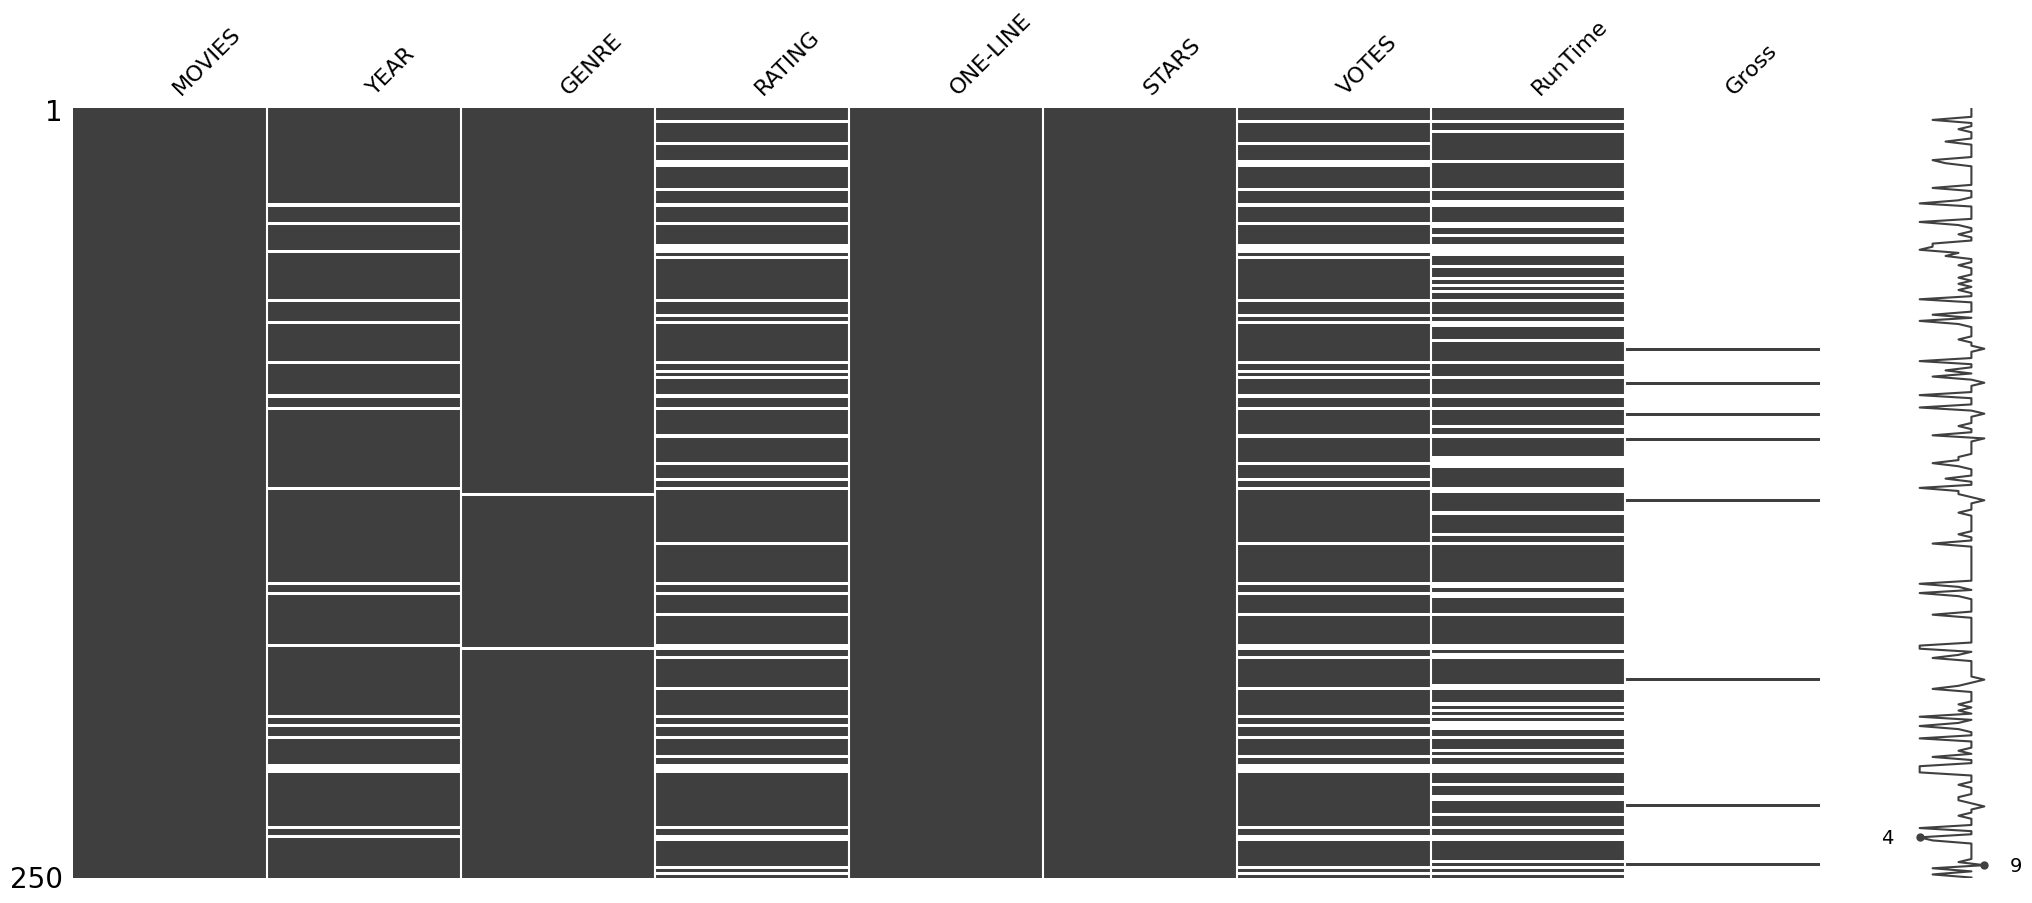

In [44]:
import missingno as msno
%matplotlib inline
msno.matrix(movies_df.sample(250))